<a href="https://colab.research.google.com/github/RabiAnjum09/codealpha_tasks/blob/main/CA_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK# 3**

**CAR PRICE PREDICTION WITH MACHINE LEARNING**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [27]:
car = pd.read_csv("car data.csv")

In [28]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [29]:
car.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [30]:
car.dtypes

,0
Car_Name,object
Year,int64
Selling_Price,float64
Present_Price,float64
Driven_kms,int64
Fuel_Type,object
Selling_type,object
Transmission,object
Owner,int64


In [31]:
print(car.duplicated().sum())

2


In [32]:
cars = car.drop_duplicates()
print("NUMBER OF DUPLICATES AFTER DROPPING:",cars.duplicated().sum())

NUMBER OF DUPLICATES AFTER DROPPING: 0


In [33]:
df_encoded = pd.get_dummies(cars, drop_first=True)
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()



*   Using trained model to predict values for `X_test`, then calculating and printing four performance metrics:

* **R² Score** → measures how well the predictions explain the variance in the actual data (closer to 1 is better).
* **Mean Absolute Error (MAE)** → average of absolute differences between predictions and actual values.
* **Mean Squared Error (MSE)** → average of squared differences.
* **Root Mean Squared Error (RMSE)** → square root of MSE, giving error in the same units as the target variable.




In [37]:
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.3910381951772156
Mean Absolute Error (MAE): 2.463430943323325
Mean Squared Error (MSE): 14.15861156880729
Root Mean Squared Error (RMSE): 3.7627930542095043




*   This code helps determine how well the model's predictions match the actual values by generating a scatter plot that compares real prices (`y_test`) to predicted prices (`y_pred`).



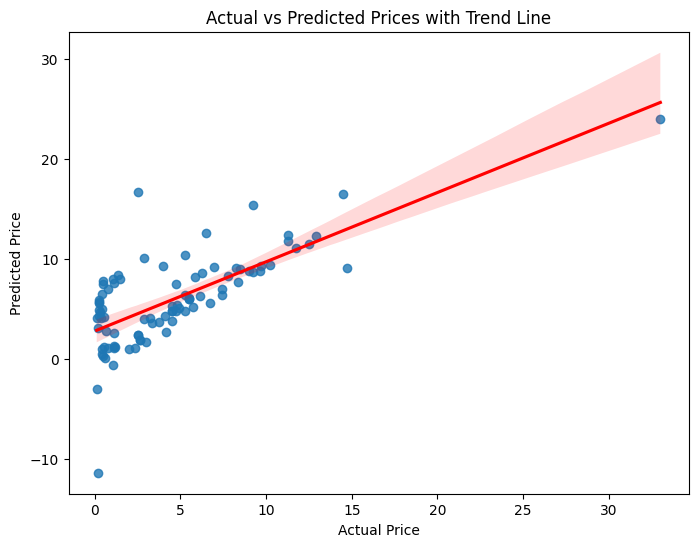

In [38]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices with Trend Line")
plt.show()



*   This code plots a side-by-side bar chart comparing actual and predicted prices for each sample.

*  By using the sample’s index on the x-axis, visual assess of how closely the predictions match the real values is taken.




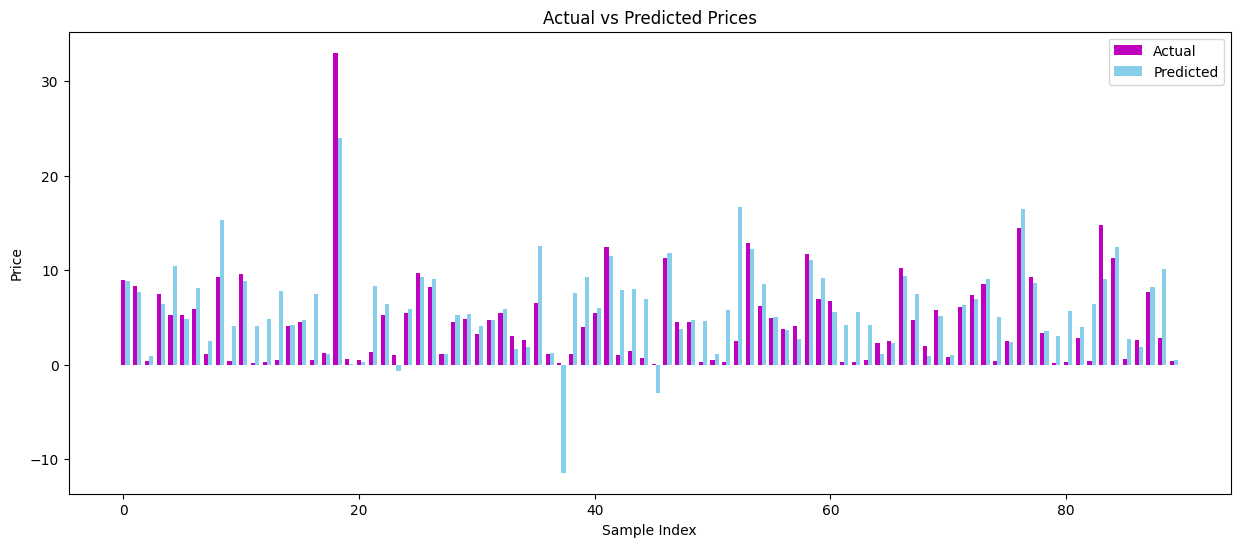

In [39]:
indices = np.arange(len(y_test))
width = 0.35

plt.figure(figsize=(15,6))
plt.bar(indices, y_test, width=width, label='Actual', color = 'm')
plt.bar(indices + width, y_pred, width=width, label='Predicted', color = 'skyblue')
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()

In [40]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                    Feature  Importance
1             Present_Price    0.905303
0                      Year    0.061364
2                Driven_kms    0.011345
91    Car_Name_land cruiser    0.008721
104     Transmission_Manual    0.003838
..                      ...         ...
61    Car_Name_Yamaha FZ 16    0.000000
58        Car_Name_TVS Wego    0.000000
73         Car_Name_corolla    0.000000
94         Car_Name_s cross    0.000000
98   Car_Name_vitara brezza    0.000000

[105 rows x 2 columns]


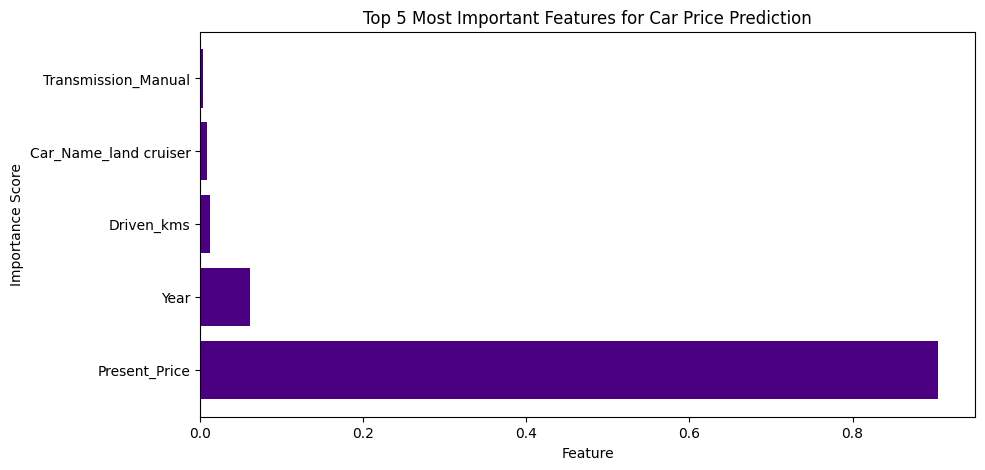

In [41]:
top5_features = importance_df.head(5)
plt.figure(figsize=(10, 5))
plt.barh(top5_features['Feature'], top5_features['Importance'], color='indigo')
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.title('Top 5 Most Important Features for Car Price Prediction')
plt.show()

**x===========================================================================================================x**